# Thermal Conductivity Tests

Below code manipulates the values of temperature and stress (computed by FLUKA+ANSYS software) as functions of drop in thermal conductivity. Since we expect the thermal conductivity to decrease with irradiation (rising DPA), by fitting temperature and stress values, we can derive the critical factor in thermal conductivity drop beyond which the material is no longer functional.  

Since there are only 5-7 data points, I'm inputing them directly instead of uploading a .txt or .csv file. 

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, fsolve

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times New Roman"] + mpl.rcParams["font.serif"]

In [5]:
# The functions we will use to fit the data
def inverse_func(x, a, b, c):
    """
    General inverse function: y = a*x^(-b) + c
    """
    return a*x**(-b)+c

def delta_func(x, a, b, c, y_target):
  """
  The finction checks how far a particular exponential output is from the desired y
  """
  return inverse_func(x, a, b, c) - y_target

## Tungsten

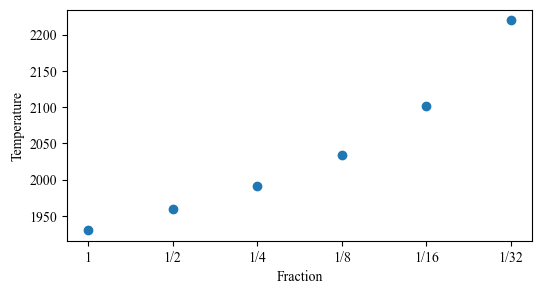

In [6]:
# input the necessary data
fraction = np.array([1,1/2,1/4,1/8,1/16,1/32])
fraction_log = np.log2(fraction)

temp = np.array([1930.3, 1959.3, 1991.9, 2034.6, 2101.1, 2219.7]) # in degrees Celsius
stress = np.array([8.7015, 17.546, 35.266, 71.195, 143.59, 291.05]) # in MPa

# Let's start with temperature
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, temp)
ax.set_xticks(fraction_log,["1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Temperature')

plt.show()

In [7]:
# fit the data with an inverse x function
# provide a guess for the coefficients to fit the data
p0 = (1., 1., 2000.)
popt, pcov = curve_fit(inverse_func, fraction, temp, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=38.860, b=0.609, c=1896.544


In [8]:
# find x at which the fit reaches the critical value, i.e., melting temperature

temp_melt = 3422

guess_x = 1/500
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, temp_melt), full_output=True)

# fsolve returns an array, extract the value
fraction_melt = x_solve[0]
frac_melt_log = np.log2(fraction_melt)

print(f"The x-value at which the fit reaches y={temp_melt} is approximately: {fraction_melt:.4f}")
print(f"Check: inverse_func({fraction_melt:.4f}) = {inverse_func(fraction_melt, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=3422 is approximately: 0.0024
Check: inverse_func(0.0024) = 3422.0000


In [9]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-9.2, 0.5, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

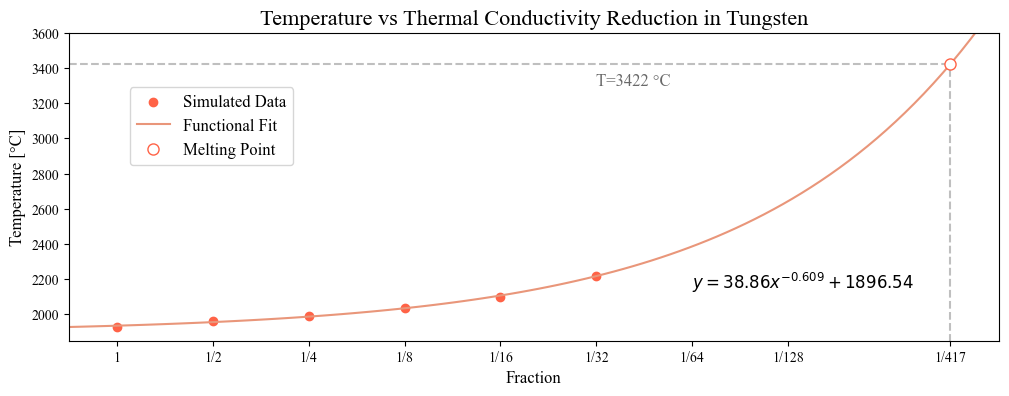

In [10]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
ax.plot([frac_melt_log, frac_melt_log], [0,temp_melt], color='gray', linestyle='--', alpha=0.5)
ax.plot([0.5, frac_melt_log], [temp_melt,temp_melt], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, temp, color='tomato', label='Simulated Data')
ax.plot(x_fit, y_fit, color='darksalmon', label='Functional Fit')
ax.plot(frac_melt_log, temp_melt, marker='o', mfc='white', mec='tomato', ms=8, color='none', label='Melting Point')

# format the plot as desired
ax.set_xticks([0,-1,-2,-3,-4,-5,-6,-7, -8.6928],["1","1/2","1/4","1/8","1/16","1/32", "1/64", "1/128", "1/417"])
ax.invert_xaxis()
ax.set_ylim(1850,3600)
ax.set_xlim(0.5,-9.2)
ax.text(-6, 2150, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
ax.text(-5, 3300, f"T={temp_melt} °C", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Temperature [°C]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.85))
ax.set_title('Temperature vs Thermal Conductivity Reduction in Tungsten', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Tungsten_Temp.png', dpi=300, bbox_inches='tight')

plt.show()

Time to repeat the same stuff for Equivalent Stress!!!

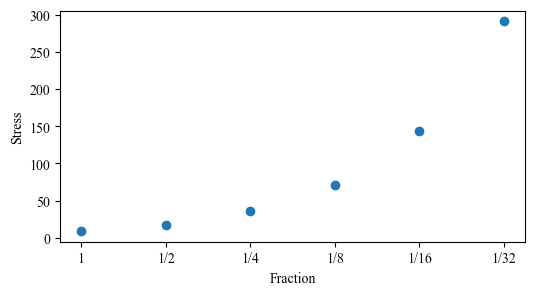

In [11]:
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, stress)
ax.set_xticks(fraction_log,["1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Stress')

plt.show()


In [12]:
# repeat the exponential fitting for stresses
p0 = (1., 1., 2000.)
popt, pcov = curve_fit(inverse_func, fraction, stress, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=8.502, b=1.019, c=0.291


In [13]:
# find x at which the fit reaches the critical value, i.e., tensile strength

stress_tens = 50

guess_x = 1/4
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, stress_tens), full_output=True)

# fsolve returns an array, extract the value
fraction_tens = x_solve[0]
frac_tens_log = np.log2(fraction_tens)

print(f"The x-value at which the fit reaches y={stress_tens} is approximately: {fraction_tens:.4f}")
print(f"Check: inverse_func({fraction_tens:.4f}) = {inverse_func(fraction_tens, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=50 is approximately: 0.1768
Check: inverse_func(0.1768) = 50.0000


In [14]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-5.3, 0.3, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

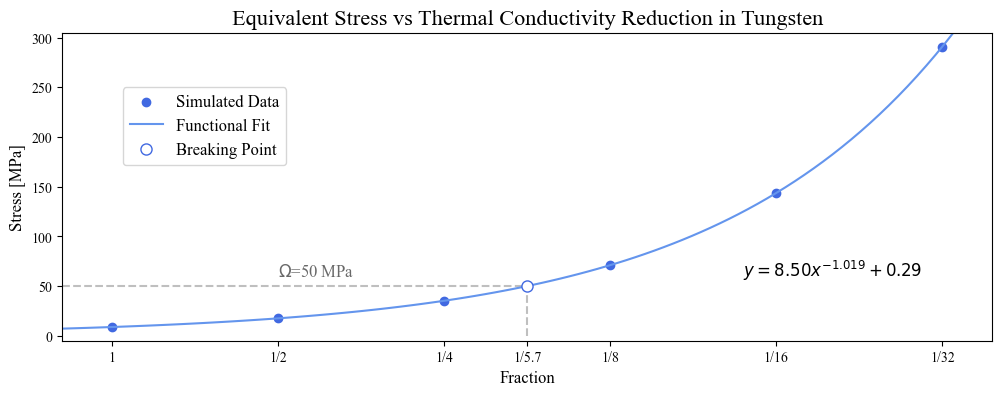

In [15]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
ax.plot([frac_tens_log, frac_tens_log], [0,stress_tens], color='gray', linestyle='--', alpha=0.5)
ax.plot([0.5, frac_tens_log], [stress_tens,stress_tens], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, stress, color='royalblue', label='Simulated Data')
ax.plot(x_fit, y_fit, color='cornflowerblue', label='Functional Fit')
ax.plot(frac_tens_log, stress_tens, marker='o', mfc='white', mec='royalblue', ms=8, color='none', label='Breaking Point')

# format the plot as desired
ax.set_xticks([0,-1,-2, frac_tens_log, -3,-4,-5],["1","1/2","1/4", "1/5.7", "1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_ylim(-5,305)
ax.set_xlim(0.3,-5.3)
ax.text(-3.8, 60, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
ax.text(-1, 60, f"$\\Omega$={stress_tens} MPa", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Stress [MPa]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.85))
ax.set_title('Equivalent Stress vs Thermal Conductivity Reduction in Tungsten', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Tungsten_Stress.png', dpi=300, bbox_inches='tight')

plt.show()

## Inconel

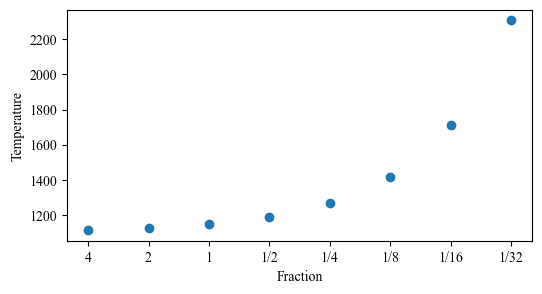

In [16]:
# input the necessary data
fraction = np.array([4, 2, 1, 1/2, 1/4, 1/8, 1/16, 1/32])
fraction_log = np.log2(fraction)

temp = np.array([1113.2, 1127.9, 1150.2, 1190.1, 1265.7, 1414.4, 1711.5, 2308.5]) # in degrees Celsius
stress = np.array([10.839, 21.674, 43.342, 86.666, 173.35, 346.69, 693.26, 1407.4]) # in MPa

# Let's start with temperature
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, temp)
ax.set_xticks(fraction_log,["4", "2", "1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Temperature')

plt.show()

In [17]:
# fit the data with an inverse x function
# provide a guess for the coefficients to fit the data
p0 = (1., 1., 2000.)
popt, pcov = curve_fit(inverse_func, fraction, temp, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=39.659, b=0.984, c=1108.251


In [18]:
# find x at which the fit reaches the critical value, i.e., melting temperature

temp_melt = 1260

guess_x = 1/4
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, temp_melt), full_output=True)

# fsolve returns an array, extract the value
fraction_melt = x_solve[0]
frac_melt_log = np.log2(fraction_melt)

print(f"The x-value at which the fit reaches y={temp_melt} is approximately: {fraction_melt:.4f}")
print(f"Check: inverse_func({fraction_melt:.4f}) = {inverse_func(fraction_melt, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=1260 is approximately: 0.2556
Check: inverse_func(0.2556) = 1260.0000


In [19]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-5.3, 2.3, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

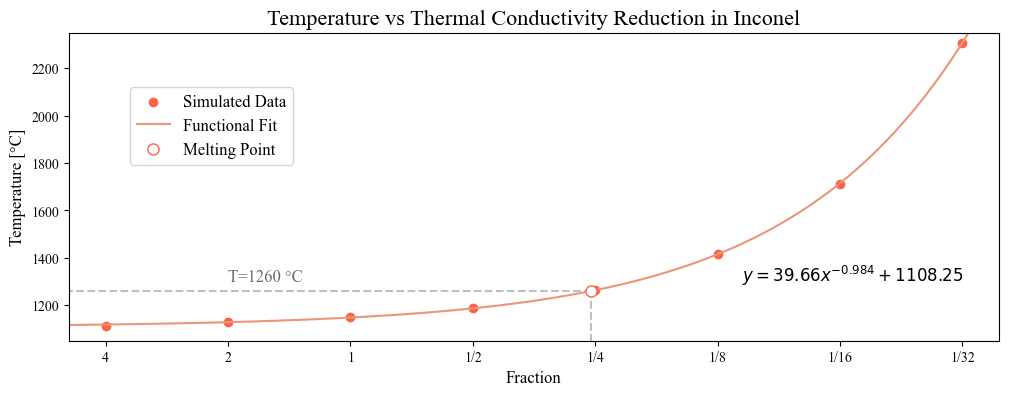

In [20]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
ax.plot([frac_melt_log, frac_melt_log], [0,temp_melt], color='gray', linestyle='--', alpha=0.5)
ax.plot([4.3, frac_melt_log], [temp_melt,temp_melt], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, temp, color='tomato', label='Simulated Data')
ax.plot(x_fit, y_fit, color='darksalmon', label='Functional Fit')
ax.plot(frac_melt_log, temp_melt, marker='o', mfc='white', mec='tomato', ms=8, color='none', label='Melting Point')

# format the plot as desired
ax.set_xticks([2, 1, 0, -1,  -2, -3, -4, -5],["4", "2", "1","1/2", "1/4","1/8","1/16","1/32"])
ax.set_ylim(1050,2350)
ax.set_xlim(2.3, -5.3)
ax.text(-3.2, 1300, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
ax.text(1, 1300, f"T={temp_melt} °C", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Temperature [°C]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.85))
ax.set_title('Temperature vs Thermal Conductivity Reduction in Inconel', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Inconel_Temp.png', dpi=300, bbox_inches='tight')

plt.show()

Time to repeat the same stuff for Equivalent Stress!!!

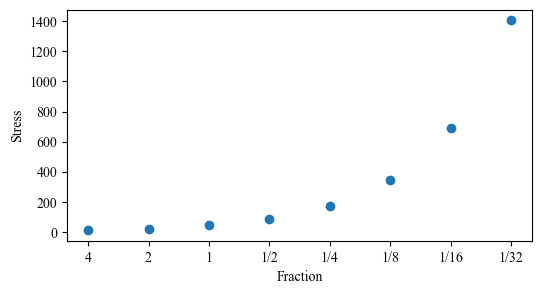

In [21]:
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, stress)
ax.set_xticks(fraction_log,["4", "2", "1","1/2", "1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Stress')

plt.show()


In [22]:
# repeat the exponential fitting for stresses
p0 = (1., 1., 0.)
popt, pcov = curve_fit(inverse_func, fraction, stress, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=41.445, b=1.017, c=1.954


In [23]:
# find x at which the fit reaches the critical value, i.e., tensile strength

stress_tens = 1100

guess_x = 1/20
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, stress_tens), full_output=True)

# fsolve returns an array, extract the value
fraction_tens = x_solve[0]
frac_tens_log = np.log2(fraction_tens)

print(f"The x-value at which the fit reaches y={stress_tens} is approximately: {fraction_tens:.4f}")
print(f"Check: inverse_func({fraction_tens:.4f}) = {inverse_func(fraction_tens, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=1100 is approximately: 0.0398
Check: inverse_func(0.0398) = 1100.0000


In [24]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-5.3, 2.3, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

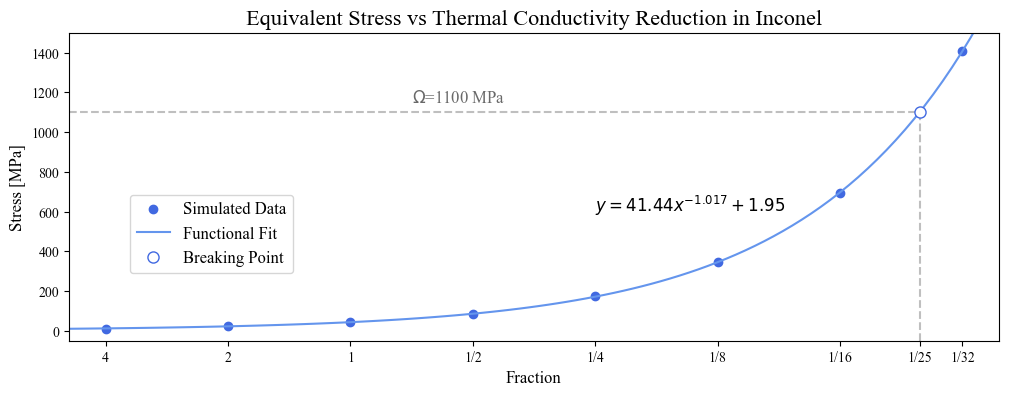

In [25]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
ax.plot([frac_tens_log, frac_tens_log], [-50,stress_tens], color='gray', linestyle='--', alpha=0.5)
ax.plot([2.3, frac_tens_log], [stress_tens,stress_tens], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, stress, color='royalblue', label='Simulated Data')
ax.plot(x_fit, y_fit, color='cornflowerblue', label='Functional Fit')
ax.plot(frac_tens_log, stress_tens, marker='o', mfc='white', mec='royalblue', ms=8, color='none', label='Breaking Point')

# format the plot as desired
ax.set_xticks([2, 1, 0, -1, -2, -3, -4, frac_tens_log, -5],["4", "2", "1","1/2","1/4", "1/8","1/16","1/25","1/32"])
#ax.invert_xaxis()
ax.set_ylim(-50, 1500)
ax.set_xlim(2.3,-5.3)
ax.text(-2, 600, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
ax.text(-0.5, 1150, f"$\\Omega$={stress_tens} MPa", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Stress [MPa]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.5))
ax.set_title('Equivalent Stress vs Thermal Conductivity Reduction in Inconel', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Inconel_Stress.png', dpi=300, bbox_inches='tight')

plt.show()

## Graphite

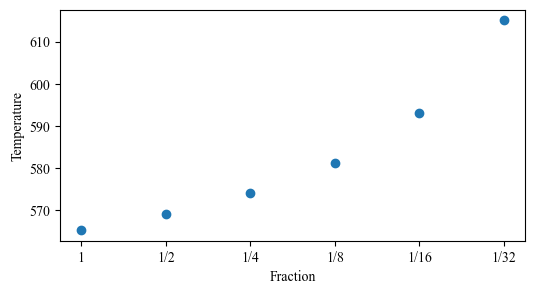

In [26]:
# input the necessary data
fraction = np.array([1,1/2,1/4,1/8,1/16,1/32])
fraction_log = np.log2(fraction)

temp = np.array([565.31, 569.23, 574.12, 581.28, 593.12, 615.07]) # in degrees Celsius
stress = np.array([0.08692, 0.1703, 0.3267, 0.6134, 1.166, 2.334]) # in MPa

# Let's start with temperature
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, temp)
ax.set_xticks(fraction_log,["1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Temperature')

plt.show()

In [27]:
# fit the data with an inverse x function
# provide a guess for the coefficients to fit the data
p0 = (1., 1., 2000.)
popt, pcov = curve_fit(inverse_func, fraction, temp, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=4.343, b=0.723, c=561.653


In [28]:
# find x at which the fit reaches the critical value, i.e., melting temperature

temp_melt = 3650

guess_x = 1/10000
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, temp_melt), full_output=True)

# fsolve returns an array, extract the value
fraction_melt = x_solve[0]
frac_melt_log = np.log2(fraction_melt)

print(f"The x-value at which the fit reaches y={temp_melt} is approximately: {fraction_melt:.4f}")
print(f"Check: inverse_func({fraction_melt:.4f}) = {inverse_func(fraction_melt, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=3650 is approximately: 0.0001
Check: inverse_func(0.0001) = 3650.0000


In [29]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-5.2, 0.5, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

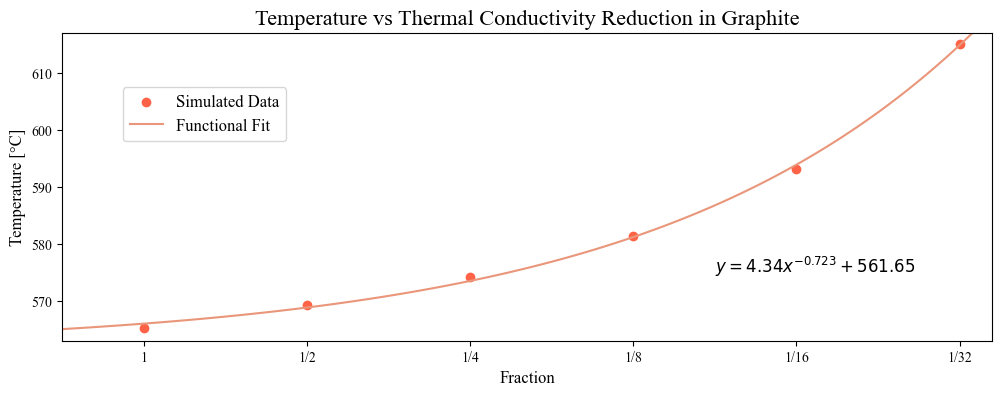

In [30]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
# ax.plot([frac_melt_log, frac_melt_log], [0,temp_melt], color='gray', linestyle='--', alpha=0.5)
# ax.plot([0.5, frac_melt_log], [temp_melt,temp_melt], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, temp, color='tomato', label='Simulated Data')
ax.plot(x_fit, y_fit, color='darksalmon', label='Functional Fit')
# ax.plot(frac_melt_log, temp_melt, marker='o', mfc='white', mec='tomato', ms=8, color='none', label='Melting Point')

# format the plot as desired
ax.set_xticks([0,-1,-2,-3,-4,-5],["1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_ylim(563, 617)
ax.set_xlim(0.5, -5.2)
ax.text(-3.5, 575, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
# ax.text(-5, 3300, f"T={temp_melt} °C", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Temperature [°C]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.85))
ax.set_title('Temperature vs Thermal Conductivity Reduction in Graphite', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Graphite_Temp.png', dpi=300, bbox_inches='tight')

plt.show()

Time to repeat the same stuff for Equivalent Stress!!!

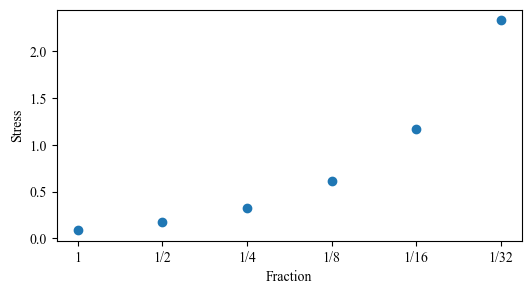

In [31]:
# plot time! just to see what we have so far
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(fraction_log, stress)
ax.set_xticks(fraction_log,["1","1/2","1/4","1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_xlabel('Fraction')
ax.set_ylabel('Stress')

plt.show()


In [32]:
# repeat the exponential fitting for stresses
p0 = (1., 1., 2000.)
popt, pcov = curve_fit(inverse_func, fraction, stress, p0)

# extract the fitted coefficients and print them out
a_opt, b_opt, c_opt = popt
print(f"Optimized parameters: a={a_opt:.3f}, b={b_opt:.3f}, c={c_opt:.3f}")

Optimized parameters: a=0.073, b=0.995, c=0.024


In [33]:
# find x at which the fit reaches the critical value, i.e., tensile strength

stress_tens = 112

guess_x = 1/1000
x_solve, info, status, msg = fsolve(delta_func, guess_x, args=(a_opt, b_opt, c_opt, stress_tens), full_output=True)

# fsolve returns an array, extract the value
fraction_tens = x_solve[0]
frac_tens_log = np.log2(fraction_tens)

print(f"The x-value at which the fit reaches y={stress_tens} is approximately: {fraction_tens:.4f}")
print(f"Check: inverse_func({fraction_tens:.4f}) = {inverse_func(fraction_tens, a_opt, b_opt, c_opt):.4f}")

The x-value at which the fit reaches y=112 is approximately: 0.0006
Check: inverse_func(0.0006) = 112.0000


In [34]:
# make arrays of fitted data points for plotting
# note that I'm using log function to decrease the number of data points needed
x_fit = np.linspace(-5.3, 0.3, 100)
y_fit = inverse_func(np.exp2(x_fit), a_opt, b_opt, c_opt)

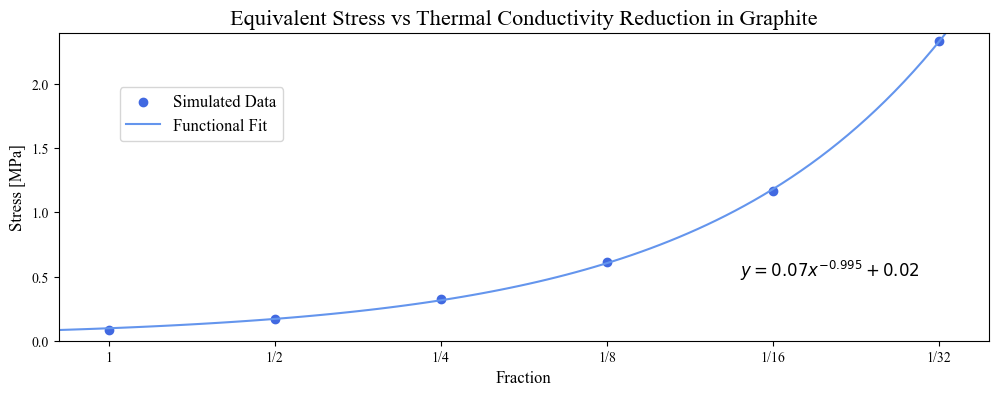

In [35]:
# plot the actual data along with the inverse fit
fig, ax = plt.subplots(figsize=(12, 4))

# add lines to denote the melting point
# ax.plot([frac_tens_log, frac_tens_log], [0,stress_tens], color='gray', linestyle='--', alpha=0.5)
# ax.plot([0.5, frac_tens_log], [stress_tens,stress_tens], color='gray', linestyle='--', alpha=0.5)

ax.scatter(fraction_log, stress, color='royalblue', label='Simulated Data')
ax.plot(x_fit, y_fit, color='cornflowerblue', label='Functional Fit')
# ax.plot(frac_tens_log, stress_tens, marker='o', mfc='white', mec='royalblue', ms=8, color='none', label='Breaking Point')

# format the plot as desired
ax.set_xticks([0,-1,-2, -3,-4,-5],["1","1/2","1/4", "1/8","1/16","1/32"])
ax.invert_xaxis()
ax.set_ylim(0., 2.4)
ax.set_xlim(0.3, -5.3)
ax.text(-3.8, 0.5, f"$y={a_opt:.2f} x^{{-{b_opt:.3f}}}+{c_opt:.2f}$", fontsize=12)
# ax.text(-1, 60, f"$\\Omega$={stress_tens} MPa", fontsize=12, color="dimgray")
ax.set_xlabel('Fraction', fontsize=12)
ax.set_ylabel('Stress [MPa]', fontsize=12)
ax.legend(fontsize=12, bbox_to_anchor=(0.25, 0.85))
ax.set_title('Equivalent Stress vs Thermal Conductivity Reduction in Graphite', fontsize=16)

# Save the plot if desired
# plt.savefig('ThC_Graphite_Stress.png', dpi=300, bbox_inches='tight')

plt.show()